Import the regular libraries

In [409]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.color      import rgb2hsv
from skimage.transform  import rescale, resize, downscale_local_mean
from skimage.util       import montage
import math                                                            



Define a function that will a) remove the background and b) calculate the mean value. The background is taken as the average values of the top 5 rows of the images, then these values are subtracted from each channel and all pixels that are on average 5 values away (15 for the three channels) are removed. 

In [220]:
def image_mean_no_background(im) :
    # reshape image into a 3 column array
    im=im[:,:,0:3]
    #print(im.shape)
    im2 = im.reshape(im.shape[0]*im.shape[1],3)
    #print(im2.shape)
    #calculate the background as the mean from the top 5 rows
    background_r = im[1:5,:,0].mean()
    background_g = im[1:5,:,1].mean()
    background_b = im[1:5,:,2].mean()
    # remove the background, for that subtract the means from each channel
    # those points that are +-5 values away from the means are not background
    
    im3 = im2[( abs(im2[:,0]-background_r)+abs(im2[:,1]-background_g)+abs(im2[:,2]-background_g))>15,:]

    #calculate mean of the image without the background
    im_mean_rgb =([ im3[:,0].mean() , im3[:,1].mean() , im3[:,2].mean()])
    return im_mean_rgb


Test with two different images, lapis lazuli (dark blue) and amber (bright yellow)

(300, 300, 3)
(90000, 3)


[92.04438391283448, 98.71524709867924, 142.41488314601597]

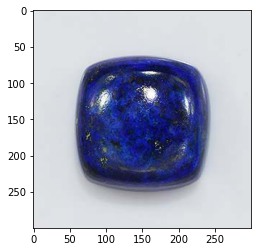

In [213]:
im = imageio.imread('test/Lapis Lazuli/lapis lazuli_3.jpg')
plt.imshow(im)
image_mean_no_background(im)


(500, 500, 3)
(250000, 3)


[194.87131905662312, 138.05957668235052, 59.18056960262668]

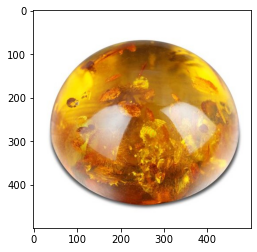

In [214]:
im = imageio.imread('test/Amber/amber_9.jpg')
plt.imshow(im)
image_mean_no_background(im)

In [215]:
# base folders
test_folders          = os.listdir('test')
train_folders         = os.listdir('train')

In [216]:
numTestFolders        = len(test_folders)
numTrainFolders       = len(train_folders)


In [358]:
number_files = 0 
for count_1 in train_folders :
    # first loop over the folders
    current_folder = os.listdir('train/'+count_1)
    #print(current_folder)    
    #second loop over the files in the folder
    for count_2 in current_folder :
        number_files = number_files + 1 
        #im = imageio.imread('train/'+count_1+ '/' +count_2)
        #print(count_2)
        #print(image_mean_no_background(im))
        #average_rgb[count_names,0:3]= image_mean_no_background(im)
        
print(number_files)    

average_rgb=np.zeros((number_files,3))
average_hsv=np.zeros((number_files,3))
all_Images  =np.zeros((128,128,3,number_files))

count_names = 0
for count_1 in train_folders :
    # first loop over the folders
    current_folder = os.listdir('train/'+count_1)
    #print(current_folder)    
    #second loop over the files in the folder
    for count_2 in current_folder :

        im = imageio.imread('train/'+count_1+ '/' +count_2)
        #print(count_2)
        #print(image_mean_no_background(im))
        tempValue                    = image_mean_no_background(im)
        average_rgb[count_names,0:3] = tempValue
        average_hsv[count_names,0:3] = rgb2hsv(np.array(tempValue))
        all_Images[:,:,:,count_names]= resize(im[:,:,0:3], (128, 128),
                       anti_aliasing=True)
        count_names                  = count_names + 1 



2856


In [392]:
index_hue = np.argsort(average_hsv[:,0])
index_hue

array([1591,  875, 1601, ..., 1099, 1519, 2698], dtype=int64)

In [478]:
side_dimensions=(3,3)
side_dimensions[0]

3

In [526]:
def image_montage(images,side_dimensions=(3,3)) :
    # determine the dimensions
    #r,c,l,nm = all_Images[:,:,:,0:9].shape
    r,c,l,nm = images.shape
    
    #determine dimensions 
    if side_dimensions[0]==side_dimensions[1] :
        # for cases where rows = cols
        side_r = math.ceil(np.sqrt(nm))
        side_c = math.ceil(np.sqrt(nm))    
        new_image = np.zeros((r*side_r,c*side_c,3))
        for count in range(nm) :
            new_r = r*math.floor(count/side_r)
            new_c = c*(count%side_c)
            #print(new_r,new_c)
            new_image[new_r:new_r+r,new_c:new_c+c,:]=images[:,:,:,count]
    else :
        # for cases where the sides are not equal
        side_r = side_dimensions[0]
        side_c = side_dimensions[1]
        #new image
        new_image = np.zeros((r*side_r,c*side_c,3))
        #print(new_image.shape)
        count = 0
        for count_c in range(side_c) :
            for count_r in range(side_r) :
                new_r = r*count_r
                new_c = c*count_c
                #print(new_r,new_c)
                if count<nm :
                    #only process if there are still images in the montage
                    new_image[new_r:new_r+r,new_c:new_c+c,:]=images[:,:,:,count]
                    count=count+1
        
    return new_image
    

(-0.5, 6399.5, 1279.5, -0.5)

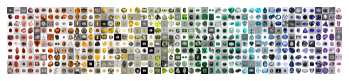

In [542]:
qq=image_montage(all_Images[:,:,:,index_hue[1:2850:5]],(10,50))
plt.imshow(qq)
plt.axis('off')

0 0
128 0
0 128
128 128
0 256
128 256
0 384
128 384
0 512
128 512


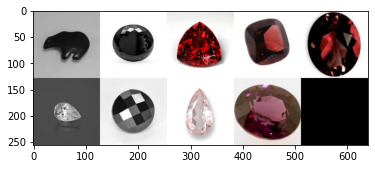

In [525]:
#q =np.reshape ([all_Images[:,:,:,0:4], all_Images[:,:,:,1] ,all_Images[:,:,:,2] ,all_Images[:,:,:,3] ], multichannel=True )
#q =np.reshape (all_Images[:,:,:,0:9],(128*3,128*3,3),order='F' )
#plt.imshow(q)

#r,c,l,nm = all_Images[:,:,:,0:4].shape

#new_image = np.zeros(r*side_mult,c*side_mult,3)

#for count in range(nm) :
#    new_r = r*math.floor(count/side_mult)
#    new_c = c*(count%side_mult)
#    print(new_r,new_c)

qq=image_montage(all_Images[:,:,:,index_hue[0:9]],(2,5))
plt.imshow(qq)


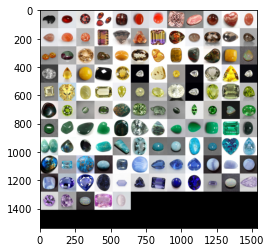

In [474]:
qq=image_montage(all_Images[:,:,:,index_hue[0:2500:20]])
plt.imshow(qq)

In [313]:
average_rgb

array([[129.32828991, 165.0513691 , 184.5776072 ],
       [105.55056158, 130.99259693, 135.44902823],
       [ 42.33295279,  69.31217495,  93.67245097],
       ...,
       [108.70806474, 126.00584186, 118.17261946],
       [ 90.29813689,  96.1492621 ,  78.64790651],
       [137.69550051, 139.58380386, 137.10000251]])

(349, 349, 3)

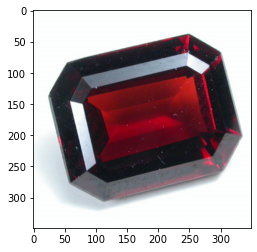

In [222]:
im = imageio.imread('train/Almandine/almandine_21.jpg')
imb=im[:,:,0:3]
plt.imshow(imb)
#image_mean_no_background(im)
imb.shape



In [328]:
average_rgb=np.zeros((9,3))
                     
#average_rgb = 'none'
#average_rgb = []
#average_rgb= (image_mean_no_background(im))
#average_rgb = image_mean_no_background(im)
#print( image_mean_no_background(im))
#average_rgb[2] = [(image_mean_no_background(im))]
#average_rgb.append(image_mean_no_background(im))
#average_rgb.append(image_mean_no_background(im/2))
#average_rgb.append(image_mean_no_background(im/3))
#average_rgb.append(image_mean_no_background(im/4))
average_rgb[0][:] =(image_mean_no_background(im))
average_rgb[1][:] =(image_mean_no_background(im/2))
average_rgb[2][:] =(image_mean_no_background(im/3))
average_rgb[3][:] =(image_mean_no_background(im/4))
average_rgb[7][:] =(image_mean_no_background(im/4))

print(average_rgb[:,1])
#print(average_rgb[1][:])
print(average_rgb)


[139.58380386  65.87267179  41.4420416   29.61179907   0.
   0.           0.          29.61179907   0.        ]
[[137.69550051 139.58380386 137.10000251]
 [ 64.62650181  65.87267179  64.54789905]
 [ 40.46790978  41.4420416   40.47495068]
 [ 28.79763838  29.61179907  28.8621938 ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [ 28.79763838  29.61179907  28.8621938 ]
 [  0.           0.           0.        ]]
